In [2]:
import pandas as pd

In [3]:
# only importing columns/rows that have values
df = pd.read_csv('phone_data.csv').iloc[0:338,0:8]
df.head()

/Users/jasonzhang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1.0,$0.00
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7.0,$0.00
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0,$0.00
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1.0,$0.00
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37.0,$0.00


1.2 Most and least frequent outgoing numbers

As seen in the table produced below, the 3 numbers with the most counts of outgoing calls are: A_1, A_5, and B_3. The numbers with the least counts of outgoing calls are: F4, F1, F2, E4, G2, F5, B5, C1, D5, E5, D1, F3, C3, and D2. 

In [4]:
freq = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)').size().to_frame().rename(columns = {0:'Count'}).sort_values(by = 'Count')
freq

,Count
Number called (to/from),
D_1,1
F_5,1
F_4,1
F_3,1
F_2,1
F_1,1
E_5,1
E_4,1
D_5,1


1.3 Highest and lowest total duration of outgoing calls

As seen in the table below, the three calls with the highest outgoing duration are A_1, A_5, and A_4. The calls with the lowest outgoing duration are E_5, E_4, D_5, and C_1. 

In [5]:
duration = df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)')['Duration'].sum().to_frame().sort_values(by='Duration')
duration

,Duration
Number called (to/from),
E_5,1.0
E_4,1.0
D_5,1.0
C_1,1.0
D_1,2.0
A_2,2.0
B_1,2.0
D_4,2.0
D_2,2.0


1.4 Location of outgoing calls

Answer is shown in table below. 

In [6]:
location = df[df['Call type'] == 'Outgoing'].groupby('From city').size().to_frame().rename(columns = {0:'Count'}).sort_values(by = 'Count')
location

,Count
From city,
CLAREMONT ON,1
NEWMARKET ON,2
TORONTO ON,244


1.5 Incoming and Outgoing calls pattern

Answers are shown in table and plot below.

The plot shows that outgoing call durations per month are much higher than that of the incoming call durations per month, especially for the peak month of september. This would be considered unusual for personal phone use.

In [7]:
#creating new column for months

#getting rid of space in from of date values
df['Date'] = df['Date'].str.lstrip()
split = df['Date'].str.split("-", n=1, expand = True)
df.insert(1,'Months', split[0])

In [8]:
# creating table for outgoing durations per month
total_dur_out = df[df['Call type'] == 'Outgoing'].groupby('Months')['Duration'].sum().to_frame().sort_values(by = 'Months')

# creating table for incoming durations per month
total_dur_in = df[df['Call type'] == 'Incoming'].groupby('Months')['Duration'].sum().to_frame().sort_values(by = 'Months')

monthly_duration = pd.merge(total_dur_out, total_dur_in, on='Months').rename(columns = {'Duration_x':'Outgoing Duration', 'Duration_y':'Incoming Duration'})
monthly_duration

,Outgoing Duration,Incoming Duration
Months,,
07,190.0,84.0
08,281.0,54.0
09,714.0,244.0
10,621.0,63.0
11,196.0,87.0


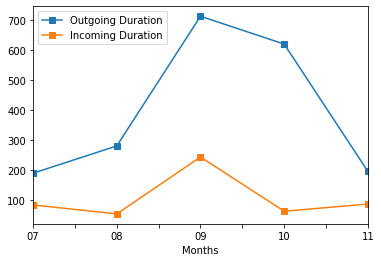

In [11]:
lines = monthly_duration.plot.line(marker='s')

1.6 Distribution of calls

As seen in the figure below, the four phone numbers received 

Text(0, 0.5, 'Number of Client Called')

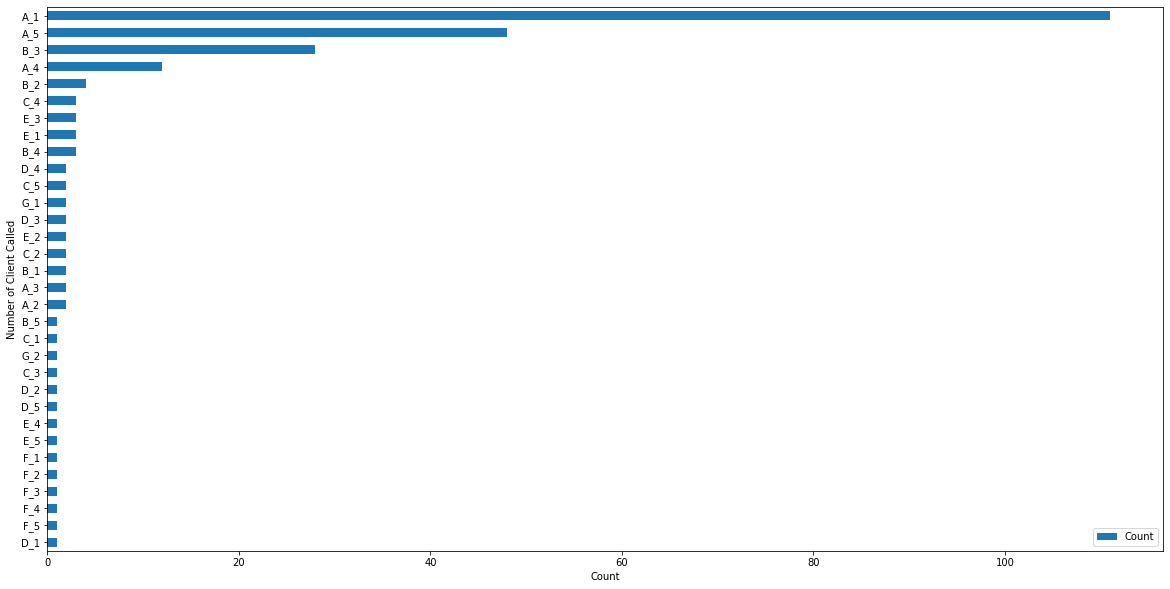

In [16]:
ax= freq.plot.barh(figsize = (20,10))
ax.set_xlabel('Count')
ax.set_ylabel('Number of Client Called')